## Loading the Iris dataset

In [1]:
import numpy as np
data_dir = 'data/'
data_file = 'irisdata.txt'
iris_data = np.loadtxt(data_dir + data_file, comments="%")

In [2]:
#Save the first 50 oservations
x = iris_data[0:50,0:4]
#print the first 10
x[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [3]:
#Number of features
n_features = x.shape[1]
print('Number of features: ', n_features)
n_obs = x.shape[0]
print('Number of observations: ', n_obs)

Number of features:  4
Number of observations:  50


## Explorative data analysis
### Exercise 2
To explore the data, we can create vectors of the individual feature:

In [4]:
sep_l = x[:,0]
sep_w = x[:,1]
pet_l = x[:,2]
pet_w = x[:,3]

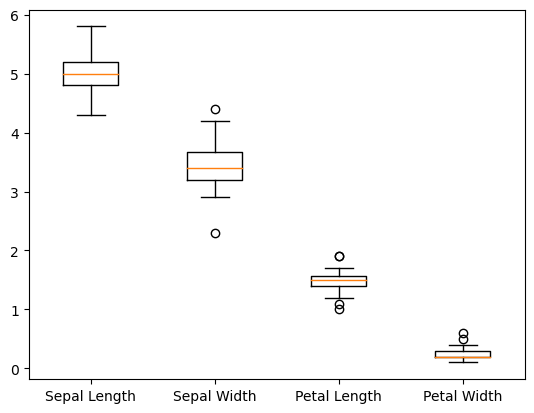

In [5]:
#Make a combined boxplot of each feature
import matplotlib.pyplot as plt
plt.boxplot([sep_l, sep_w, pet_l, pet_w])
plt.xticks([1,2,3,4],['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

In [6]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)
#Print the variance of each feature
print('The variance of sepal length is: ', var_sep_l)
print('The variance of sepal width is: ', var_sep_w)
print('The variance of petal length is: ', var_pet_l)
print('The variance of petal width is: ', var_pet_w)

The variance of sepal length is:  0.12424897959183677
The variance of sepal width is:  0.1436897959183674
The variance of petal length is:  0.030159183673469384
The variance of petal width is:  0.01110612244897959


### Exercise 3

In [7]:
#Now compute the covariance between sepal length and sepal width not using the built-in np function but instead using the formula
#cov(x,y) = (1/n-1) * sum((x_i - mean(x)) * (y_i - mean(y)))
#First compute the mean of each feature
mean_sep_l = sep_l.mean()
mean_sep_w = sep_w.mean()

#Now compute the covariance
cov_sep_l_sep_w = 0
for i in range(n_obs):
    cov_sep_l_sep_w += (sep_l[i] - mean_sep_l) * (sep_w[i] - mean_sep_w)
cov_sep_l_sep_w = cov_sep_l_sep_w / (n_obs - 1)
print('The covariance between sepal length and sepal width is: ', cov_sep_l_sep_w)

The covariance between sepal length and sepal width is:  0.09921632653061224


In [8]:
#Now compute the covariance between sepal length and sepal width using the built-in np function
cov_sep_l_sep_w = np.cov(sep_l, sep_w)
print('The covariance between sepal length and sepal width is: ', cov_sep_l_sep_w)

The covariance between sepal length and sepal width is:  [[0.12424898 0.09921633]
 [0.09921633 0.1436898 ]]


In [15]:
#compute the covariance matrix
cov_mat = np.cov(x.T)
print('The covariance matrix is: ')
print(cov_mat)

The covariance matrix is: 
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


The result is similar to that of the np function (the non-diagonal part of the matrix) because I decided to substract the mean when calculating the covariance.

### Exercise 4

In [10]:
import seaborn as sns
import pandas as pd

<Figure size 640x480 with 0 Axes>

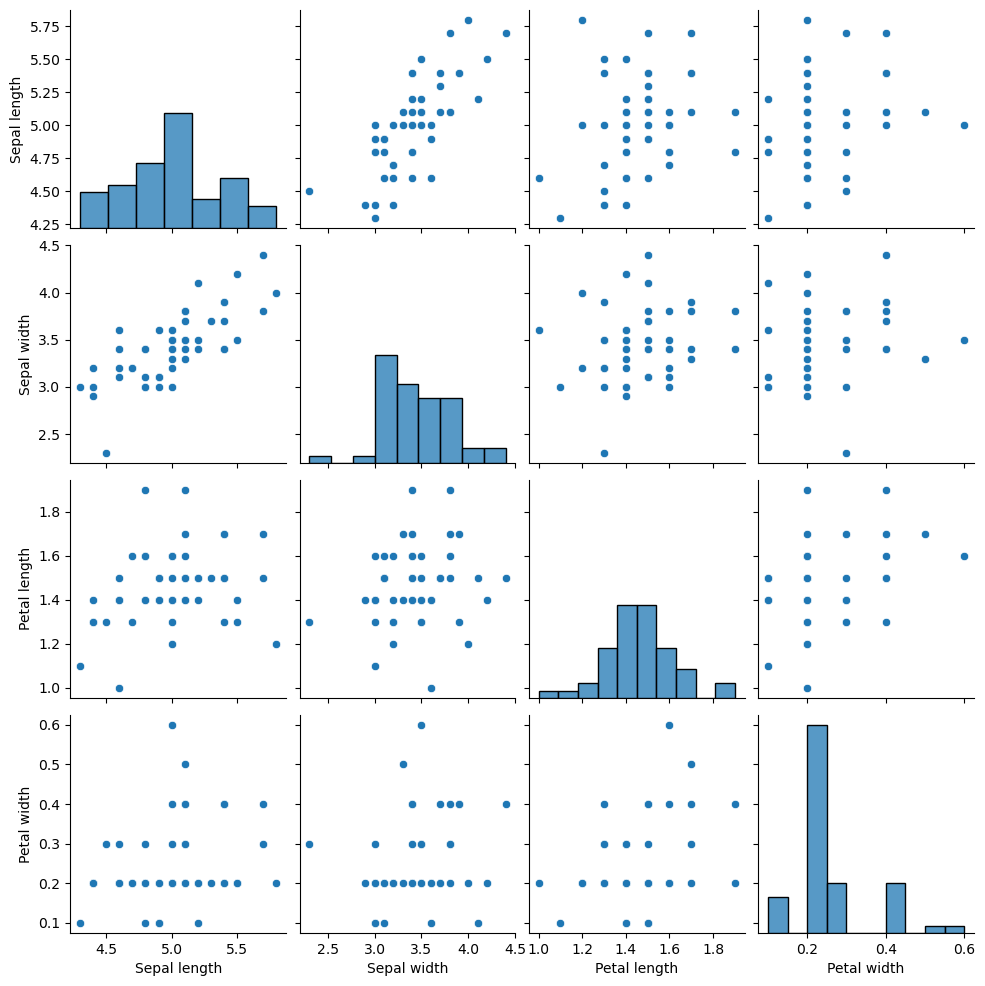

In [12]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

What measurements are related and which ones are not-related? Can you recognise the results you found, when you computed the variance and covariance?

Yes; the variance was significantly higher on the sepal features,which can also be seen from the range of these 2 features on the above plot (4-6 and 2-4.5 respectively) vs the petal variance of about 1-1.9 and 0.1 to 0.6. 

In terms of cov the largest correlation was clearly between 